<a href="https://colab.research.google.com/github/MuhammetSarican/global_ai_hub-summer_camp/blob/main/Project_1-Medical_Cost_Analysis/Medical_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("insurance.csv")

In [5]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

##○ Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz


In [8]:
data["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [9]:
data["bmi"].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

In [10]:
data["bmi"].mean()

30.66339686098655

In [11]:
data["bmi"].min()

15.96

In [12]:
data["bmi"].max()

53.13

In [13]:
data["bmi"].var()

37.18788360977323

##○ “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

In [14]:
corr_data=pd.DataFrame(data.corr())
corr_data

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [15]:
corr_data["charges"]

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

In [16]:
data[["smoker","charges"]].corr()

,charges
charges,1.0


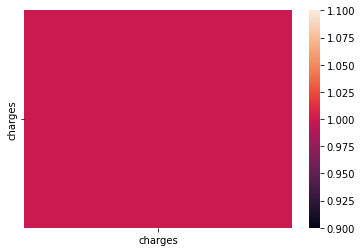

In [17]:
sns.heatmap(data[["smoker","charges"]].corr())

<BarContainer object of 1338 artists>

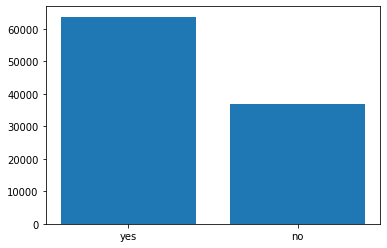

In [18]:
plt.bar(data["smoker"],data["charges"])

##○ “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.


<BarContainer object of 1338 artists>

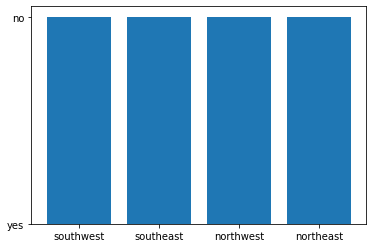

In [19]:
plt.bar(data["region"],data["smoker"])

##○ “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


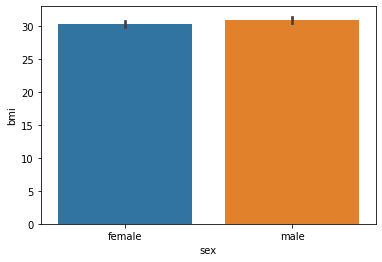

In [20]:
sns.barplot(data["sex"],data["bmi"])

##○ En çok “children”’a sahip “region”’ı bulunuz.
En çok çocuğun bulunduğu bölgeyi bulmak için max() fonksiyonunu kullanıyoruz.

In [21]:
data.groupby("children")["region"].max().describe()

count             6
unique            1
top       southwest
freq              6
Name: region, dtype: object

##○ “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


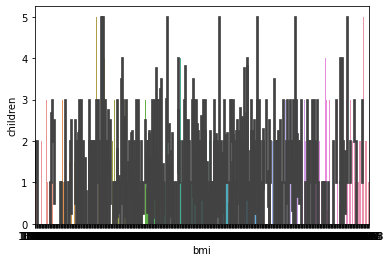

In [22]:
sns.barplot(data["bmi"],data["children"])

###![Image](https://miro.medium.com/max/564/1*fFS_qm8rCTK9RCtYuQc7gw.png)

##Resimde görülen 1. çeyrek ve 3.çeyrek değerlerinin dışındaki değerler outlier olarak kabul edilmektedir.



quantile(0.25) fonksiyonu 1.çeyrek değerini döndürür.

In [23]:
q1Outlier=data[data["bmi"]<data["bmi"].quantile(0.25)]["bmi"]
q1Outlier

3       22.705
5       25.740
9       25.840
10      26.220
11      26.290
         ...  
1316    20.600
1324    25.935
1328    24.225
1330    25.740
1336    25.800
Name: bmi, Length: 335, dtype: float64

quantile(0.75) fonksiyonu 3.çeyrek değerini döndürür.

In [24]:
q3Outlier=data[data["bmi"]>data["bmi"].quantile(0.75)]["bmi"]
q3Outlier

13      39.820
14      42.130
18      40.300
19      35.300
20      36.005
         ...  
1322    38.830
1323    40.370
1329    38.600
1332    44.700
1335    36.850
Name: bmi, Length: 335, dtype: float64

In [25]:
print(f"Outlier Sayısı: {q1Outlier.count()+q3Outlier.count()}")

Outlier Sayısı: 670


##○ “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


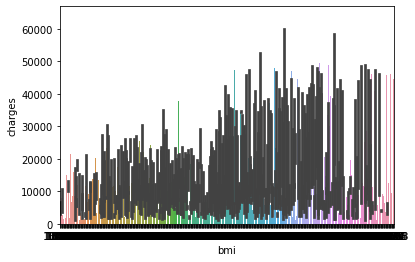

In [26]:
sns.barplot(data["bmi"],data["charges"])

##○ “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

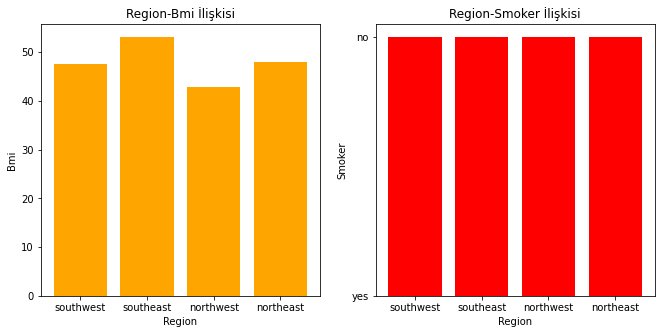

In [27]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.bar(data["region"],data["bmi"],color="orange")
plt.title("Region-Bmi İlişkisi")
plt.xlabel("Region")
plt.ylabel("Bmi")
plt.subplot(1,2,2)
plt.bar(data["region"],data["smoker"],color="red")
plt.title("Region-Smoker İlişkisi")
plt.xlabel("Region")
plt.ylabel("Smoker")
plt.show()

In [28]:
dataset=data.copy()

In [29]:
dataset.drop("sex",axis=1,inplace=True)

In [30]:
dataset["male"]=0
dataset["male"][data[data["sex"]=="male"].index]=1
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1
1334,18,31.920,0,no,northeast,2205.98080,0
1335,18,36.850,0,no,southeast,1629.83350,0
1336,21,25.800,0,no,southwest,2007.94500,0


In [31]:
dataset["female"]=0
dataset["female"][data[data["sex"]=="female"].index]=1
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,children,smoker,region,charges,male,female
0,19,27.900,0,yes,southwest,16884.92400,0,1
1,18,33.770,1,no,southeast,1725.55230,1,0
2,28,33.000,3,no,southeast,4449.46200,1,0
3,33,22.705,0,no,northwest,21984.47061,1,0
4,32,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,northwest,10600.54830,1,0
1334,18,31.920,0,no,northeast,2205.98080,0,1
1335,18,36.850,0,no,southeast,1629.83350,0,1
1336,21,25.800,0,no,southwest,2007.94500,0,1


In [32]:
dataset.drop("smoker",axis=1,inplace=True)

In [33]:
dataset["smoker"]=0
dataset["smoker"][data[data["smoker"]=="yes"].index]=1
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,children,region,charges,male,female,smoker
0,19,27.900,0,southwest,16884.92400,0,1,1
1,18,33.770,1,southeast,1725.55230,1,0,0
2,28,33.000,3,southeast,4449.46200,1,0,0
3,33,22.705,0,northwest,21984.47061,1,0,0
4,32,28.880,0,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1,0,0
1334,18,31.920,0,northeast,2205.98080,0,1,0
1335,18,36.850,0,southeast,1629.83350,0,1,0
1336,21,25.800,0,southwest,2007.94500,0,1,0


In [34]:
dataset.drop("region",axis=1,inplace=True)

In [35]:
dataset["northeast"]=0
dataset["northeast"][data[data["region"]=="northeast"].index]=1
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,children,charges,male,female,smoker,northeast
0,19,27.900,0,16884.92400,0,1,1,0
1,18,33.770,1,1725.55230,1,0,0,0
2,28,33.000,3,4449.46200,1,0,0,0
3,33,22.705,0,21984.47061,1,0,0,0
4,32,28.880,0,3866.85520,1,0,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0
1334,18,31.920,0,2205.98080,0,1,0,1
1335,18,36.850,0,1629.83350,0,1,0,0
1336,21,25.800,0,2007.94500,0,1,0,0


In [36]:
dataset["northwest"]=0
dataset["northwest"][data[data["region"]=="northwest"].index]=1
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,children,charges,male,female,smoker,northeast,northwest
0,19,27.900,0,16884.92400,0,1,1,0,0
1,18,33.770,1,1725.55230,1,0,0,0,0
2,28,33.000,3,4449.46200,1,0,0,0,0
3,33,22.705,0,21984.47061,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1
1334,18,31.920,0,2205.98080,0,1,0,1,0
1335,18,36.850,0,1629.83350,0,1,0,0,0
1336,21,25.800,0,2007.94500,0,1,0,0,0


In [37]:
dataset["southeast"]=0
dataset["southeast"][data[data["region"]=="southeast"].index]=1
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,children,charges,male,female,smoker,northeast,northwest,southeast
0,19,27.900,0,16884.92400,0,1,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1,0
1334,18,31.920,0,2205.98080,0,1,0,1,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0,1
1336,21,25.800,0,2007.94500,0,1,0,0,0,0


In [38]:
dataset["southwest"]=0
dataset["southwest"][data[data["region"]=="southwest"].index]=1
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bmi,children,charges,male,female,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,1,0,0,0,0,1


Üstteki kısımlarda sayısal olmayan veriler sayısal olacak şekilde düzenlenmiştir. Bunun sebebi sayısal veriler üzerinde analizler yapılmasından dolayıdır.

---

In [39]:
dataset_2=pd.DataFrame()
dataset_2["age"]=dataset["age"]
dataset_2["bmi"]=dataset["bmi"]
dataset_2["charges"]=dataset["charges"]
dataset_2["children"]=dataset["children"]
dataset_2

,age,bmi,charges,children
0,19,27.900,16884.92400,0
1,18,33.770,1725.55230,1
2,28,33.000,4449.46200,3
3,33,22.705,21984.47061,0
4,32,28.880,3866.85520,0
...,...,...,...,...
1333,50,30.970,10600.54830,3
1334,18,31.920,2205.98080,0
1335,18,36.850,1629.83350,0
1336,21,25.800,2007.94500,0


In [40]:
dataset

,age,bmi,children,charges,male,female,smoker,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,1,0,0,0,0,1


In [41]:
X=dataset_2.drop("age",axis=1)
y=dataset_2["age"]

In [42]:
from sklearn.model_selection import train_test_split as tts, GridSearchCV as grid
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report as cr, confusion_matrix as conf, mean_squared_error as mse, mean_absolute_error as mae

X_train, X_test, y_train, y_test=tts(X,y,test_size=0.3)

In [43]:
linear_regression_model=LinearRegression()
logistic_regression_model=LogisticRegression()
ridge_classifier_model=RidgeClassifier()

In [ ]:
linear_regression_model_params={
    'age': list(dataset['age']),
    'charges':list(dataset['charges']),
}
grid_model=grid(estimator=linear_regression_model, param_grid=linear_regression_model_params).fit(X_train,y_train)

In [ ]:
linear_regression_model_params.keys()

In [45]:
linear_regression_model.fit(X_train,y_train)
logistic_regression_model.fit(X_train,y_train)
ridge_classifier_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RidgeClassifier()

In [46]:
linear_regression_preds=linear_regression_model.predict(X_test)
logistic_regression_preds=logistic_regression_model.predict(X_test)
ridge_classifier_preds=ridge_classifier_model.predict(X_test)

In [47]:
print(f"""
Linear Regression Mean Squarred Error:
{mse(y_test, linear_regression_preds)}
Linear Regression Mean Absolute Error:
{mae(y_test, linear_regression_preds)}

Logistic Regression Mean Squarred Error:
{mse(y_test, logistic_regression_preds)}
Logistic Regression Mean Absolute Error:
{mae(y_test, logistic_regression_preds)}

Ridge Classifier Mean Squarred Error:
{mse(y_test, ridge_classifier_preds)}
Ridge Classifier Mean Absolute Error:
{mae(y_test, ridge_classifier_preds)}
""")


Linear Regression Mean Squarred Error:
181.3111787957876
Linear Regression Mean Absolute Error:
11.64848362552586

Logistic Regression Mean Squarred Error:
543.773631840796
Logistic Regression Mean Absolute Error:
18.942786069651742

Ridge Classifier Mean Squarred Error:
516.1194029850747
Ridge Classifier Mean Absolute Error:
18.00995024875622

